In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
from nilearn import image as nimg
from nilearn import plotting as nplot
from bids import BIDSLayout
#for inline visualization in jupyter notebook
%matplotlib inline 

In [17]:
layout = BIDSLayout('/media/quizhpilema.134643/Datos/BIDS/derivatives', config=['bids','derivatives'])

/home/quizhpilema.134643/anaconda3/lib/python3.9/site-packages/bids/layout/models.py:148: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  warnings.warn("The 'extension' entity currently excludes the leading dot ('.'). "


In [28]:
#layout.get_subjects()
#layout.get_tasks()

In [74]:
T1w_files = layout.get(subject='C001',
                       datatype='anat', desc='preproc',
                       space='MNI152NLin2009cAsym',
                       extension="nii.gz",
                      return_type='file')

brainmask_files = layout.get(subject='C001',
                             datatype='anat', suffix='mask',
                             desc='brain',
                             space='MNI152NLin2009cAsym',
                             extension="nii.gz",
                            return_type='file')

func_files = layout.get(subject='C001',
                        datatype='func', desc='preproc',
                       space='MNI152NLin2009cAsym',
                       extension="nii.gz",
                       return_type='file')

func_mask_files = layout.get(subject='C001',
                             datatype='func', suffix='mask',
                             desc='brain',
                             space='MNI152NLin2009cAsym',
                             extension="nii.gz",
                            return_type='file')
mask_files = layout.get(subject='C001',
                        datatype='func', task='resting',
                        desc='brain',
                        suffix='mask',
                        space='MNI152NLin2009cAsym',
                        extension="nii.gz",
                       return_type='file')

confound_files = layout.get(subject='C001',
                            datatype='func', task='resting',
                            desc='confounds',
                           extension="tsv",
                           return_type='file')

In [27]:
T1_files

['/media/quizhpilema.134643/Datos/BIDS/derivatives/sub-C001/anat/sub-C001_run-1_desc-preproc_T1w.nii.gz',
 '/media/quizhpilema.134643/Datos/BIDS/derivatives/sub-C001/anat/sub-C001_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_T1w.nii.gz']

In [30]:
brainmask_files

['/media/quizhpilema.134643/Datos/BIDS/derivatives/sub-C001/anat/sub-C001_run-1_desc-brain_mask.nii.gz',
 '/media/quizhpilema.134643/Datos/BIDS/derivatives/sub-C001/anat/sub-C001_run-1_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz']

In [33]:
mni_preproc_T1 = layout.get(datatype = 'anat', desc = 'preproc', extension = '.nii.gz', space = 'MNI152NLin2009cAsym')
#mni_preproc_T1

In [37]:
t1 = T1_files[0]
bm = brainmask_files[0]

t1_img = nimg.load_img(t1)
bm_img = nimg.load_img(bm)

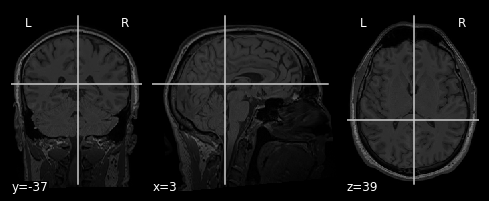

In [38]:
nplot.plot_anat(t1_img)


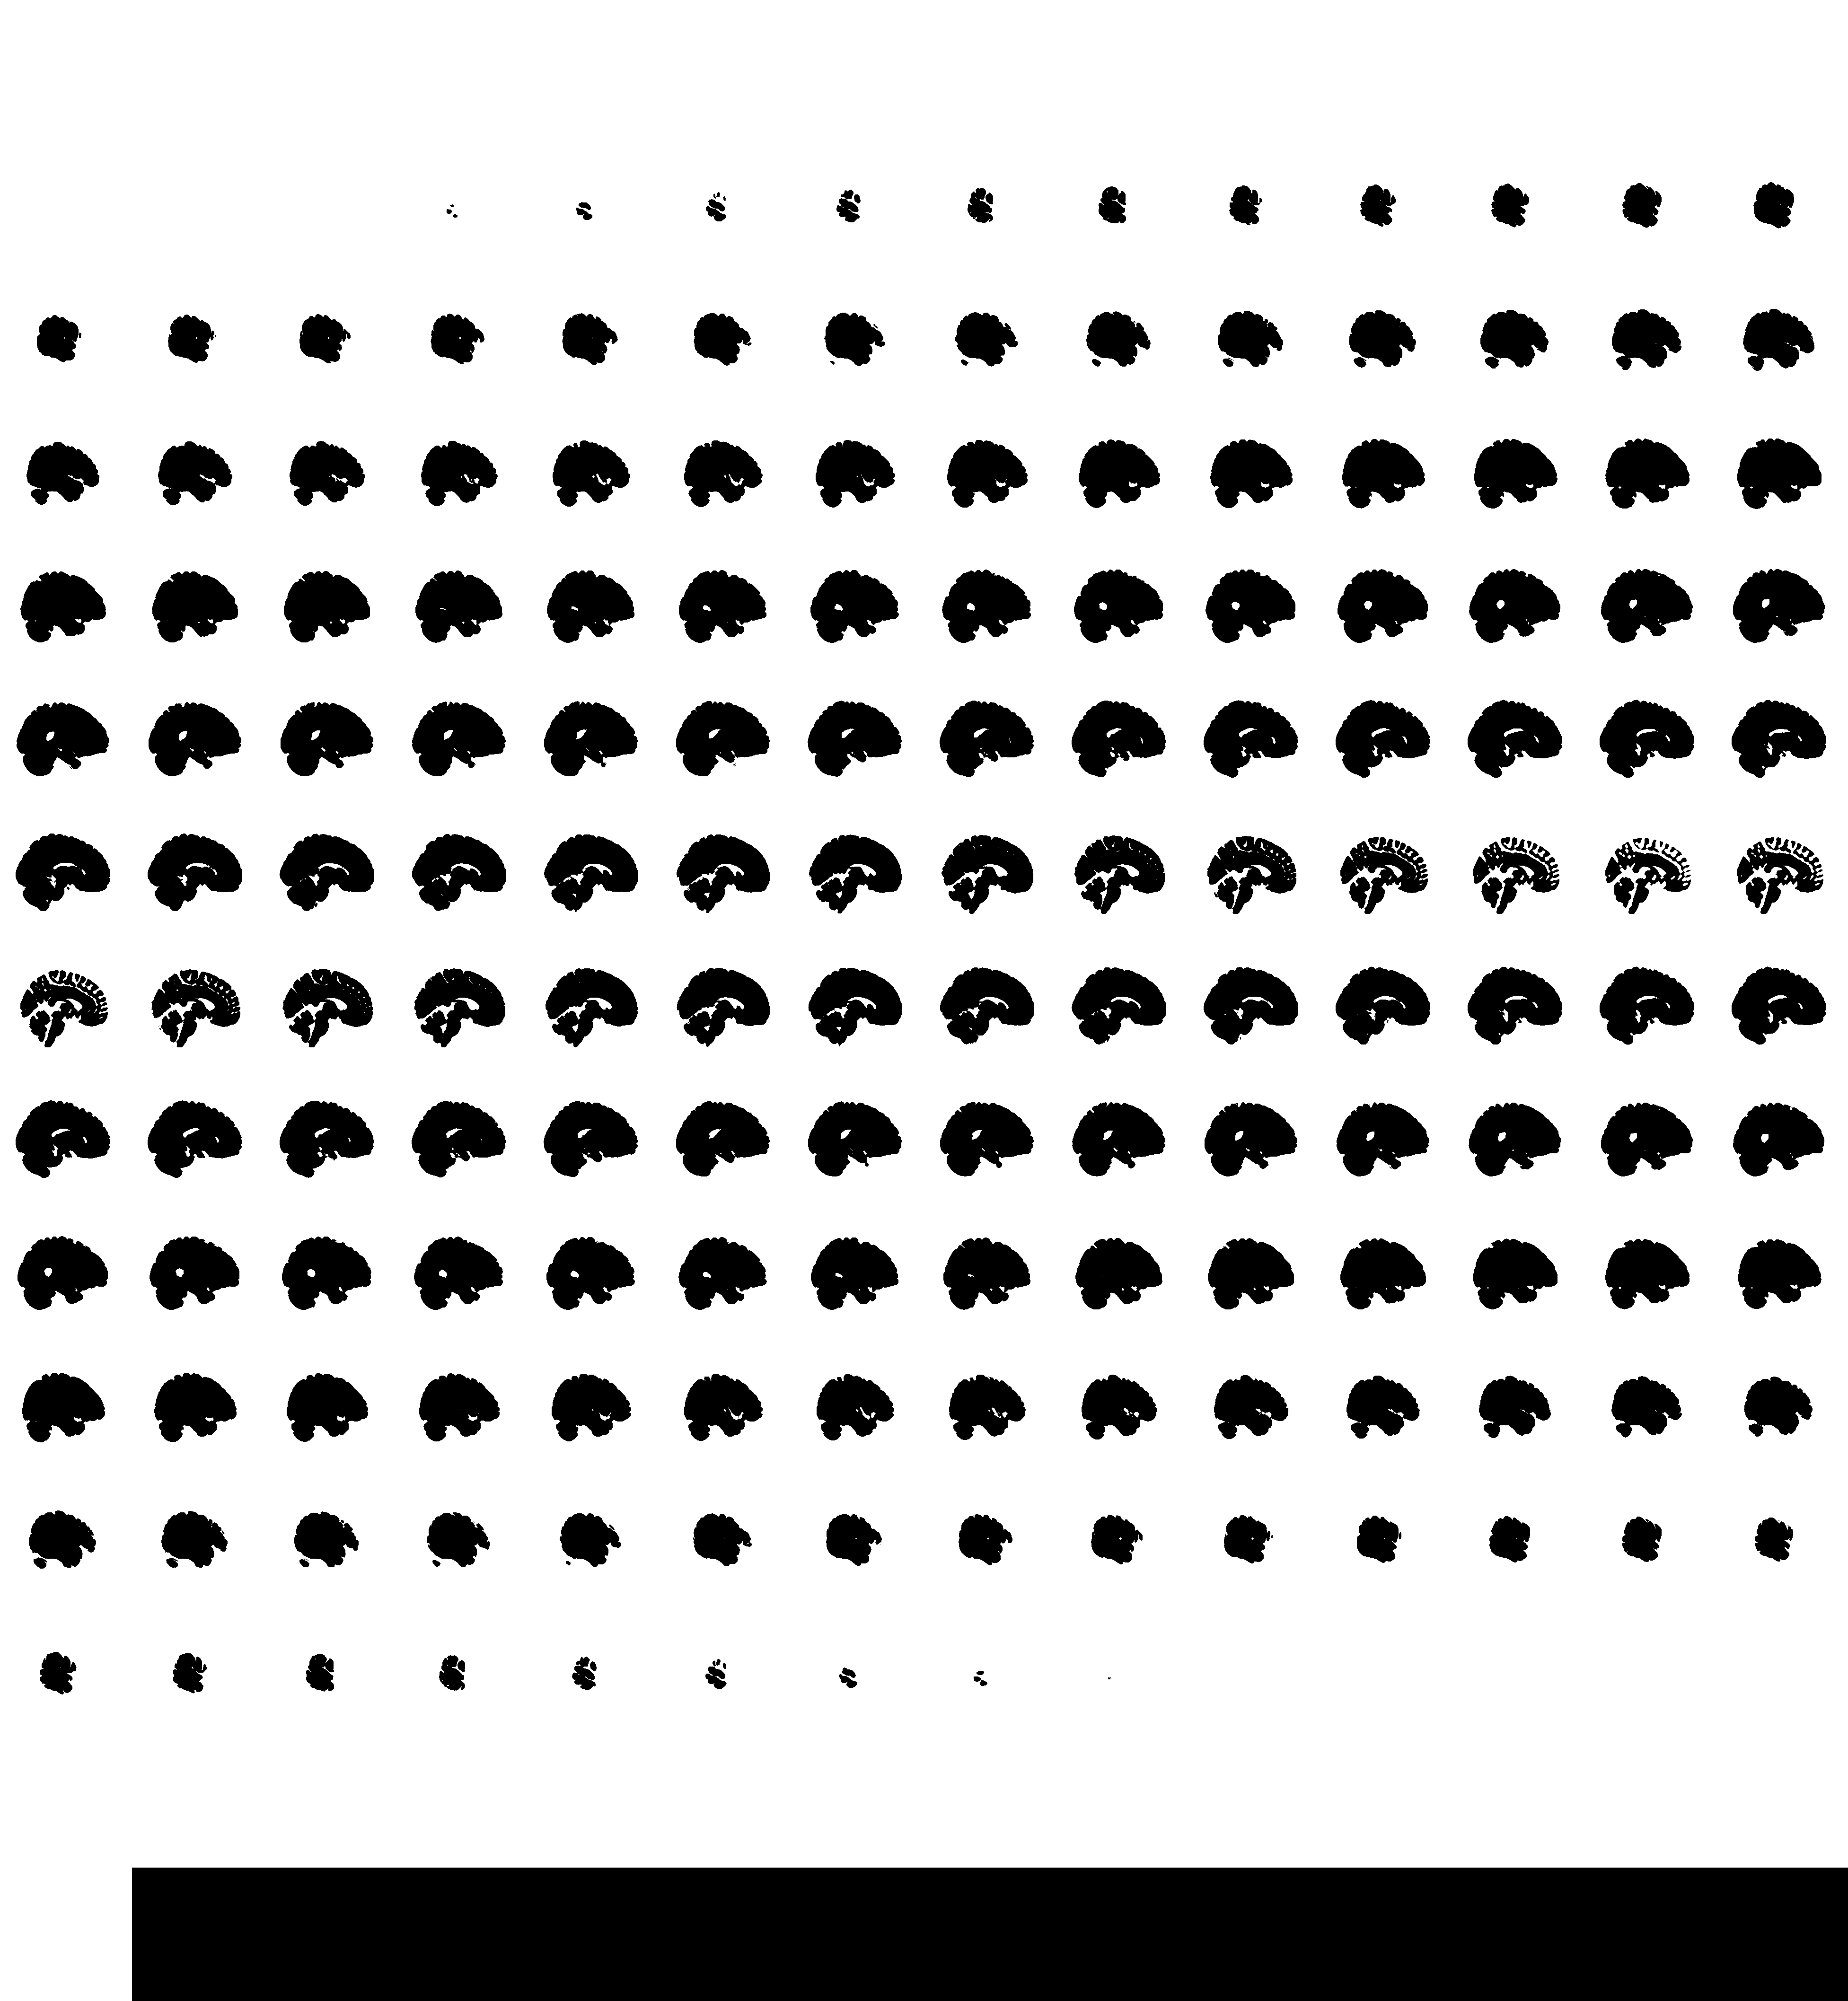
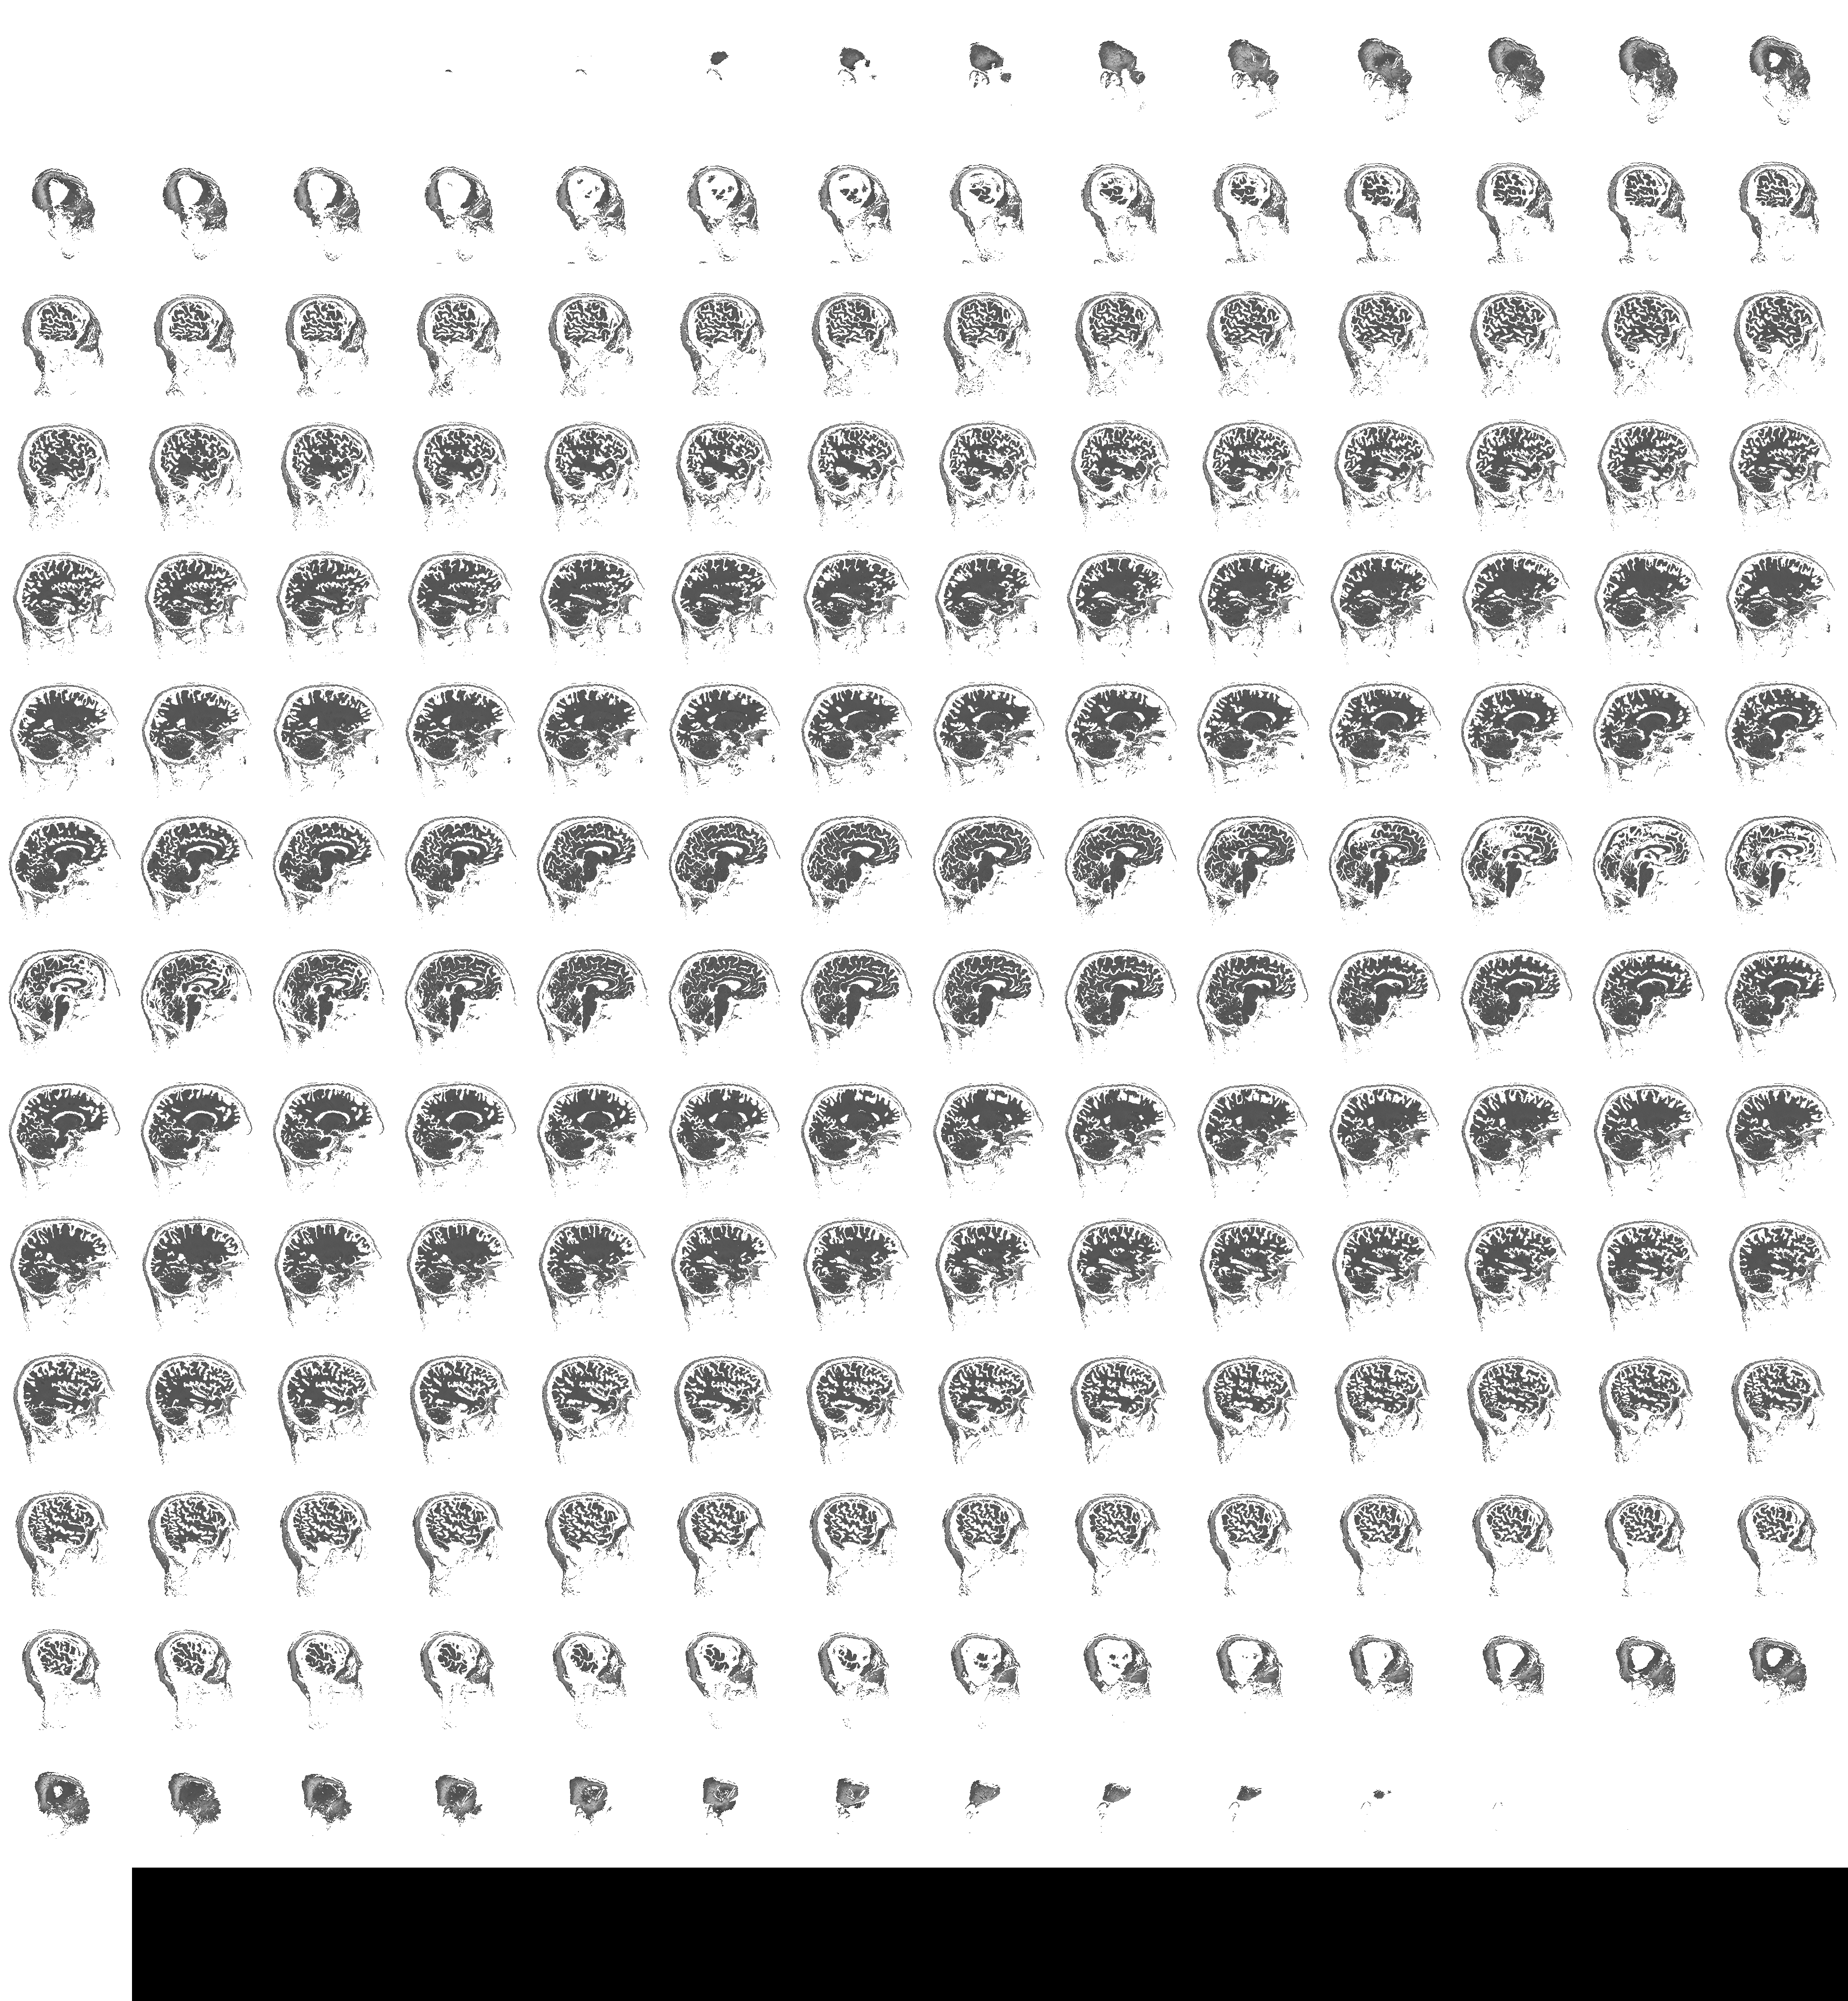

In [39]:
nplot.view_img(t1_img,
              bg_img=False,
              cmap='Greys_r',
              symmetric_cmap=False,
              threshold="auto")

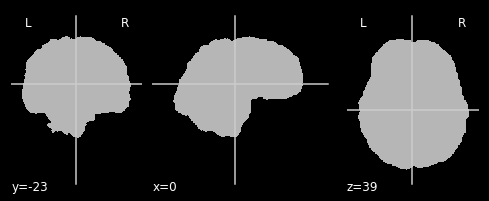

In [40]:
nplot.plot_anat(bm_img)

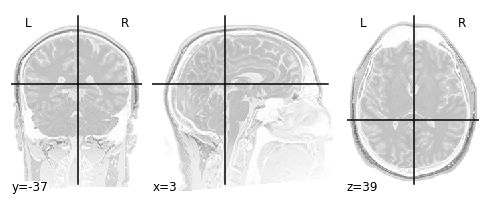

In [42]:
invert_img = nimg.math_img('-a', a=t1)
nplot.plot_anat(invert_img)

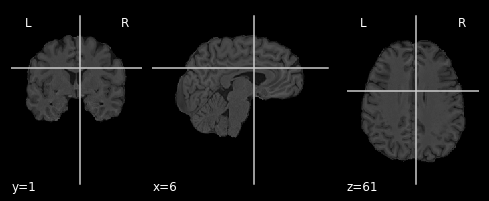

In [44]:
masked_t1 = nimg.math_img('a*b', a=t1, b=bm)
nplot.plot_anat(masked_t1)

In [45]:
x_slice = t1_img.slicer[10:11,:,:]

In [46]:
t1_data = t1_img.get_data()
x_slice = t1_data[10,:,:]

/tmp/ipykernel_15345/2145684726.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  t1_data = t1_img.get_data()


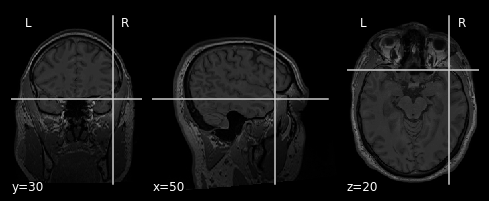

In [47]:
nplot.plot_anat(t1_img,cut_coords=(50,30,20))

In [49]:
func_mni = func_files[0]
func_mni_img = nimg.load_img(func_mni)

In [50]:
func_mni_img.shape

(97, 115, 97, 200)

/home/quizhpilema.134643/anaconda3/lib/python3.9/site-packages/nilearn/plotting/html_stat_map.py:217: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()



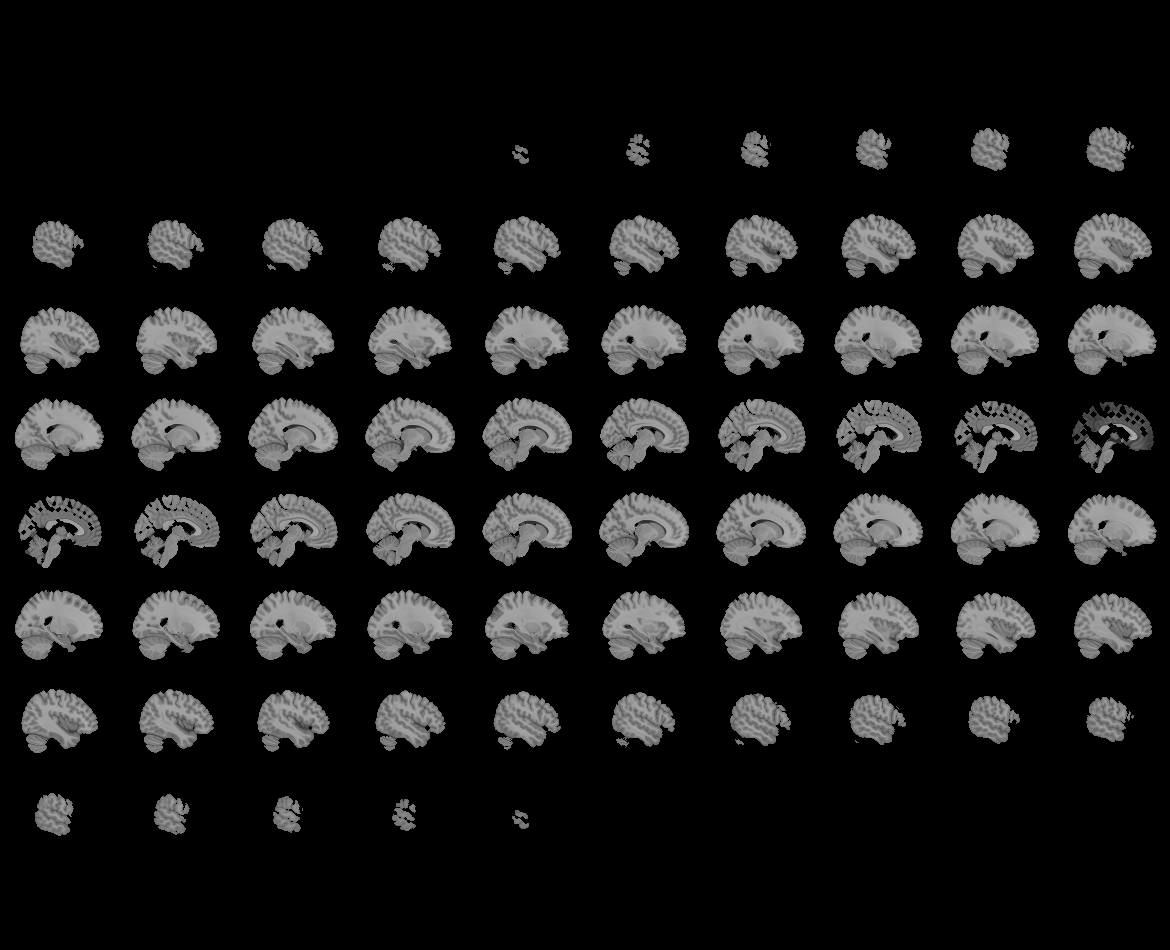
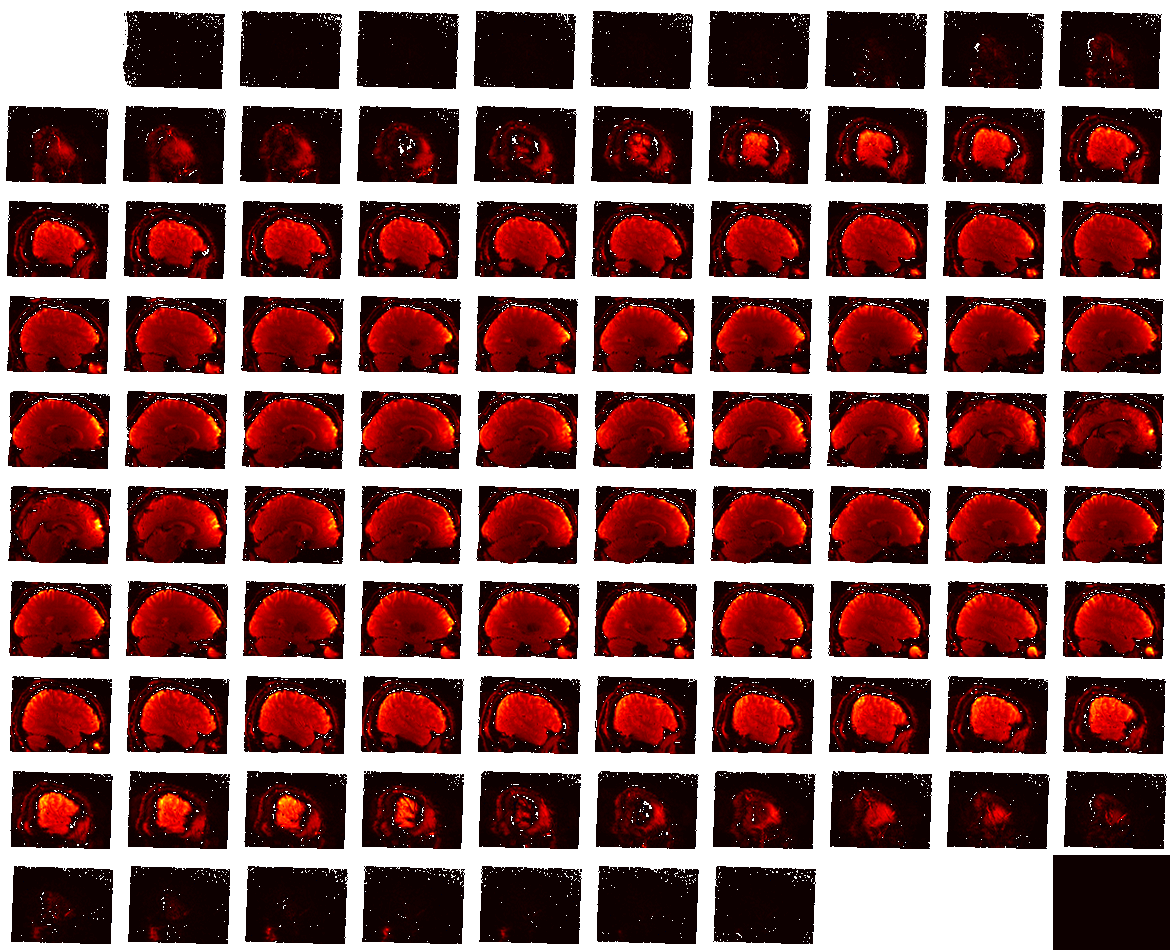

In [51]:
func_vol5 = func_mni_img.slicer[:,:,:,4]
nplot.view_img(func_vol5)

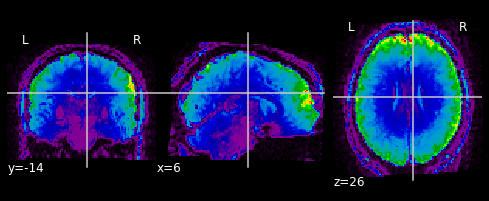

In [52]:
nplot.plot_epi(func_vol5)

In [53]:
#Pick one voxel at coordinate (60,45,88)
single_vox = func_mni_img.slicer[59:60,45:46,30:31,:].get_data()
single_vox.shape

/tmp/ipykernel_15345/3656379670.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  single_vox = func_mni_img.slicer[59:60,45:46,30:31,:].get_data()


(1, 1, 1, 200)

In [54]:
single_vox = single_vox.flatten()
single_vox.shape

(200,)

In [55]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Signal Value')

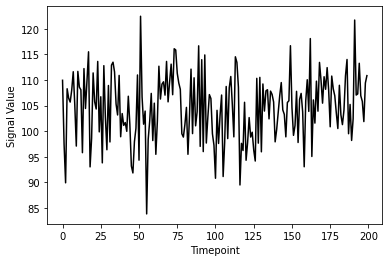

In [58]:
# Make an array counting from 0 --> 200, this will be our x-axis
x_axis = np.arange(0, single_vox.shape[0])

# Plot our x and y data, the 'k' just specifies the line color to be black
plt.plot( x_axis, single_vox, 'k')

# Label our axes
plt.xlabel('Timepoint')
plt.ylabel('Signal Value')

In [59]:
# Files we'll be using (Notice that we're using _space-MNI...
# which means they are normalized brains)
T1_mni = T1w_files[0]
T1_mni_img = nimg.load_img(T1_mni)

In [60]:
print(T1_mni_img.shape)
print(func_mni_img.shape)

(97, 115, 97)
(97, 115, 97, 200)


(97, 115, 97)
(97, 115, 97, 200)


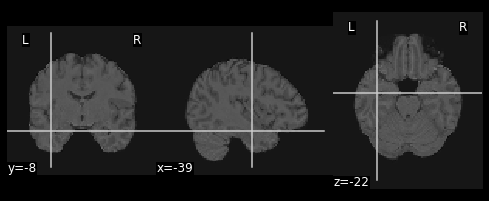

In [64]:
#Try playing around with methods of interpolation
#options: 'linear','continuous','nearest'
resamp_t1 = nimg.resample_to_img(source_img=T1_mni_img,target_img=func_mni_img,interpolation='continuous')
print(resamp_t1.shape)
print(func_mni_img.shape)
nplot.plot_anat(resamp_t1)

In [76]:
import pandas as pd

In [77]:
func_file = func_files[0]
mask_file = mask_files
confound_file = confound_files[0]

In [79]:
#Delimiter is \t --> tsv is a tab-separated spreadsheet
confound_df = pd.read_csv(confound_file, delimiter='\t')
confound_df.head()

global_signal  global_signal_derivative1  global_signal_power2  \
0     285.332720                        NaN          81414.761177   
1     285.082256                  -0.250464          81271.892970   
2     284.805960                  -0.276297          81114.434849   
3     284.952333                   0.146373          81197.832067   
4     285.279509                   0.327176          81384.398022   

   global_signal_derivative1_power2         csf  csf_derivative1  \
0                               NaN  334.165231              NaN   
1                          0.062732  332.602529        -1.562703   
2                          0.076340  332.419100        -0.183429   
3                          0.021425  330.877470        -1.541630   
4                          0.107044  331.463269         0.585799   

      csf_power2  csf_derivative1_power2  white_matter  \
0  111666.401840                     NaN    206.962148   
1  110624.442167                2.442039    206.736722   
2  110502.457800                0.033646    206.821507   
3  109479.900142                2.376622    206.777656   
4  109867.898847                0.343161    207.020263   

   white_matter_derivative1  ...  rot_x_power2  rot_x_derivative1_power2  \
0                       NaN  ...  1.435910e-07                       NaN   
1                 -0.225426  ...  4.874162e-07              1.019001e-07   
2                  0.084786  ...  2.285375e-07              4.844225e-08   
3                 -0.043851  ...  7.238845e-07              1.389485e-07   
4                  0.242607  ...  1.099506e-07              2.695956e-07   

      rot_y  rot_y_derivative1  rot_y_derivative1_power2  rot_y_power2  \
0  0.000573                NaN                       NaN  3.282156e-07   
1  0.000433          -0.000140              1.970739e-08  1.870718e-07   
2  0.000297          -0.000135              1.834670e-08  8.824940e-08   
3  0.000372           0.000074              5.540867e-09  1.380160e-07   
4  0.000883           0.000512              2.619341e-07  7.802189e-07   

      rot_z  rot_z_derivative1  rot_z_derivative1_power2  rot_z_power2  
0  0.001272                NaN                       NaN  1.617246e-06  
1  0.001179          -0.000093              8.622980e-09  1.389687e-06  
2  0.000797          -0.000382              1.458690e-07  6.350847e-07  
3  0.001109           0.000312              9.716188e-08  1.229060e-06  
4  0.001238           0.000129              1.674695e-08  1.532743e-06  

[5 rows x 223 columns]

In [80]:
# Select confounds
confound_vars = ['trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z',
                 'global_signal',
                 'csf', 'white_matter']

In [81]:
# Get derivative column names
derivative_columns = ['{}_derivative1'.format(c) for c
                     in confound_vars]

print(derivative_columns)

['trans_x_derivative1', 'trans_y_derivative1', 'trans_z_derivative1', 'rot_x_derivative1', 'rot_y_derivative1', 'rot_z_derivative1', 'global_signal_derivative1', 'csf_derivative1', 'white_matter_derivative1']


In [82]:
final_confounds = confound_vars + derivative_columns
print(final_confounds)

['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z', 'global_signal', 'csf', 'white_matter', 'trans_x_derivative1', 'trans_y_derivative1', 'trans_z_derivative1', 'rot_x_derivative1', 'rot_y_derivative1', 'rot_z_derivative1', 'global_signal_derivative1', 'csf_derivative1', 'white_matter_derivative1']


In [83]:
confound_df = confound_df[final_confounds]
confound_df.head()

trans_x   trans_y   trans_z     rot_x     rot_y     rot_z  global_signal  \
0  0.074105 -0.010159 -0.032248 -0.000379  0.000573  0.001272     285.332720   
1  0.071499  0.077631 -0.012501 -0.000698  0.000433  0.001179     285.082256   
2  0.061148 -0.069258 -0.030947 -0.000478  0.000297  0.000797     284.805960   
3  0.060078  0.055044 -0.020935 -0.000851  0.000372  0.001109     284.952333   
4  0.065613 -0.054781 -0.051522 -0.000332  0.000883  0.001238     285.279509   

          csf  white_matter  trans_x_derivative1  trans_y_derivative1  \
0  334.165231    206.962148                  NaN                  NaN   
1  332.602529    206.736722            -0.002606             0.087791   
2  332.419100    206.821507            -0.010351            -0.146890   
3  330.877470    206.777656            -0.001069             0.124302   
4  331.463269    207.020263             0.005535            -0.109825   

   trans_z_derivative1  rot_x_derivative1  rot_y_derivative1  \
0                  NaN                NaN                NaN   
1             0.019747          -0.000319          -0.000140   
2            -0.018446           0.000220          -0.000135   
3             0.010011          -0.000373           0.000074   
4            -0.030587           0.000519           0.000512   

   rot_z_derivative1  global_signal_derivative1  csf_derivative1  \
0                NaN                        NaN              NaN   
1          -0.000093                  -0.250464        -1.562703   
2          -0.000382                  -0.276297        -0.183429   
3           0.000312                   0.146373        -1.541630   
4           0.000129                   0.327176         0.585799   

   white_matter_derivative1  
0                       NaN  
1                 -0.225426  
2                  0.084786  
3                 -0.043851  
4                  0.242607

In [85]:
#First we'll load in our data and check the shape
raw_func_img = nimg.load_img(func_files)
raw_func_img.shape

(97, 115, 97, 200)

In [86]:
func_img = raw_func_img.slicer[:,:,:,4:]
func_img.shape

(97, 115, 97, 196)

In [87]:
#Drop confound dummy TRs
drop_confound_df = confound_df.loc[4:]
print(drop_confound_df.shape) #number of rows should match that of the functional image
drop_confound_df.head()

(196, 18)


trans_x   trans_y   trans_z     rot_x     rot_y     rot_z  global_signal  \
4  0.065613 -0.054781 -0.051522 -0.000332  0.000883  0.001238     285.279509   
5  0.062852 -0.039760 -0.034005 -0.000989  0.000289  0.000785     285.334759   
6  0.069752 -0.043944 -0.051711 -0.000834  0.000489  0.000773     285.376876   
7  0.048712  0.004313 -0.035334 -0.000693  0.000661  0.001406     285.190340   
8  0.065560 -0.051377 -0.046701 -0.000083  0.000459  0.000856     284.880664   

          csf  white_matter  trans_x_derivative1  trans_y_derivative1  \
4  331.463269    207.020263             0.005535            -0.109825   
5  331.618652    207.160941            -0.002761             0.015021   
6  331.230093    207.300076             0.006900            -0.004184   
7  331.327110    207.372221            -0.021040             0.048257   
8  331.928824    207.503546             0.016848            -0.055691   

   trans_z_derivative1  rot_x_derivative1  rot_y_derivative1  \
4            -0.030587           0.000519           0.000512   
5             0.017517          -0.000657          -0.000594   
6            -0.017706           0.000155           0.000200   
7             0.016377           0.000141           0.000172   
8            -0.011366           0.000610          -0.000202   

   rot_z_derivative1  global_signal_derivative1  csf_derivative1  \
4           0.000129                   0.327176         0.585799   
5          -0.000453                   0.055250         0.155383   
6          -0.000012                   0.042118        -0.388559   
7           0.000633                  -0.186537         0.097017   
8          -0.000550                  -0.309676         0.601714   

   white_matter_derivative1  
4                  0.242607  
5                  0.140678  
6                  0.139135  
7                  0.072144  
8                  0.131325

In [88]:
confounds_matrix = drop_confound_df.values

#Confirm matrix size is correct
confounds_matrix.shape

(196, 18)

In [92]:
#Set some constants
high_pass= 0.009
low_pass = 0.08
t_r = 2

#Clean!
clean_img = nimg.clean_img(func_img,confounds=confounds_matrix,detrend=True,standardize=True,
                         low_pass=low_pass,high_pass=high_pass,t_r=t_r, mask_img=func_mask_files)

#Let's visualize our result! Doesn't really tell us much, but that's the data we're using for analysis!
nplot.plot_epi(clean_img.slicer[:,:,:,50])

DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a list of 3D images (4D). See http://nilearn.github.io/manipulating_images/input_output.html.